# Part 3

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Loading and splitting Dataset

In [600]:
# Loading Dataset
url = "Part1_data12.csv"
dataset = pd.read_csv(url)

# Normalization of the Dataset

In [601]:
def normalization(d_set):
    sigma   = np.sqrt(d_set['y'].var())
    average = d_set['y'].mean()

    for i in range(len(d_set)):
        d_set['y'][i] = (d_set['y'][i] - average)/sigma
    return d_set

Transformation fo y_norm to [0, 1]

In [602]:
def transform(y_trans):
    max_y = y_trans['y'].max()
    min_y = y_trans['y'].min()
    for i in range(len(y_trans)):
        y_trans['y'][i] = ( y_trans['y'][i] - min_y)/(max_y - min_y)
    return y_trans

# Randomly mix the dataset by the function simple

In [603]:
dataframe = pd.DataFrame(dataset)
dataframe_mixed = dataframe.sample(frac=1)
# dataframe_mixed

# We take 70% as a training data and 30% as a testing data

In [604]:
dataframe_mixed[:int(len(dataframe)*0.7)].to_csv(r'training_dataset_part2.csv', index=False, header=True)

dataframe_mixed[int(len(dataframe)*0.7):len(dataframe)].to_csv(r'testing_dataset_part2.csv'  , index=False, header=True)


#  Read and visualize the given data.

In [605]:
training_dataset_url = "training_dataset_part2.csv"
testing_dataset_url  = "testing_dataset_part2.csv"

training_dataset = pd.read_csv(training_dataset_url)
testing_dataset  = pd.read_csv(testing_dataset_url)

norm_train_dset  = pd.read_csv(training_dataset_url)
norm_test_dset   = pd.read_csv(testing_dataset_url)

# Normalization and transformation to 0 1 of the training dataset's labels

Normalization

In [618]:
norm_train_dset = normalization(norm_train_dset)
norm_test_dset  = normalization(norm_test_dset)

Transofmation of dataset domaine to [0, 1] domaine

In [619]:
norm_train_dset = transform(norm_train_dset)
norm_test_dset  = transform(norm_test_dset)

The function h recovery of the original value of y

In [608]:
def h(y):
    max_y  = training_dataset['y'].max()
    min_y  = training_dataset['y'].min()
    sigma  = np.sqrt(dataset['y'].var())
    mean_y = dataset['y'].mean()
#     return sigma*((max_y-min_y)*y + min_y) + mean_y
    return (max_y-min_y)*y + min_y

# Sigmoid Function

In [609]:
def segmoid(w, x):
    return 1/(1 + np.exp(-np.matmul(w,x)))

# The empirical error

In [610]:
# The empirical error MSE
def MSE(w,d_set):
    MSE = 0
    for i in range(len(d_set)):
        MSE = MSE + pow(d_set['y'][i] - segmoid(w, [1, d_set['x'][i]]),2)
    return MSE/len(d_set)

# Armijo learning rate

In [611]:
# Calculation of the step Armijo
def armijo(wk, dk, d_set, empiricalError = MSE):
    alpha = 1
    X = 0.25*alpha*np.matmul(gradient(wk, d_set,empiricalError), dk)
    while empiricalError(np.add(wk, np.multiply(alpha,dk)), d_set) - empiricalError(wk, d_set) > X:
        alpha = alpha/4
        X = 0.25*alpha*np.matmul(gradient(wk, d_set,empiricalError), dk)
    return alpha

# Gradient

In [612]:
# Calculation of the gradient
def gradient(w, d_set, empiricalError = MSE):
    grad = []
    wi = [float(0) for i in range(len(w))]
    for i in range(len(w)):
        for k in range(len(w)):
            wi[k] = w[k]
        wi[i] = wi[i] + 1e-10
        grad.append((empiricalError(wi,d_set) - empiricalError(w,d_set))/1e-10)
    return grad

# Gradient Descent Method

In [613]:
# Gradient descent method
def gradientDescent(delta, wk, d_set, armij=False,alpha=0,empiricalError=MSE):
    gk = np.multiply(-1,gradient(wk, d_set, empiricalError))
    k = 0
    while np.linalg.norm(gk)>delta:
        if k>100:
            break
        print("k = {0:d}, norm = {1:.4f}, MSE = {1:.2f}".format(k,np.linalg.norm(gk),empiricalError(wk,d_set)))
        if armij == True:
            alpha = armijo(wk,gk, d_set)
        wk = np.add(wk, np.multiply(alpha,gk))
        gk = np.multiply(-1,gradient(wk, d_set, empiricalError))
        k = k+1
    return wk

In [614]:
# Plotting the training dataset with hypotesis function
def plot_h(w,df):
    plt.scatter(df['x'], df['y'], c = 'red', marker = '*')
    x   = []
    h_x = []
    k = int(df['x'].min())-1
    while int(df['x'].max())+2>k : 
        x.append(k)
        h_x.append(h(segmoid(w,[1,k])))
        k = k + 0.5
    plt.plot(x, h_x, linewidth=4)

In [615]:
w_optim = gradientDescent(0.001, [-2.17888238,  0.15607655], norm_train_dset, armij=True)

k = 0, norm = 0.2231, MSE = 0.22
k = 1, norm = 0.0296, MSE = 0.03
k = 2, norm = 0.0033, MSE = 0.00
k = 3, norm = 0.0140, MSE = 0.01
k = 4, norm = 0.0032, MSE = 0.00
k = 5, norm = 0.0084, MSE = 0.01
k = 6, norm = 0.0031, MSE = 0.00
k = 7, norm = 0.0056, MSE = 0.01
k = 8, norm = 0.0030, MSE = 0.00
k = 9, norm = 0.0041, MSE = 0.00
k = 10, norm = 0.0030, MSE = 0.00
k = 11, norm = 0.0034, MSE = 0.00
k = 12, norm = 0.0062, MSE = 0.01
k = 13, norm = 0.0030, MSE = 0.00
k = 14, norm = 0.0046, MSE = 0.00
k = 15, norm = 0.0029, MSE = 0.00
k = 16, norm = 0.0036, MSE = 0.00
k = 17, norm = 0.0073, MSE = 0.01
k = 18, norm = 0.0029, MSE = 0.00
k = 19, norm = 0.0045, MSE = 0.00
k = 20, norm = 0.0028, MSE = 0.00
k = 21, norm = 0.0033, MSE = 0.00
k = 22, norm = 0.0063, MSE = 0.01
k = 23, norm = 0.0028, MSE = 0.00
k = 24, norm = 0.0043, MSE = 0.00
k = 25, norm = 0.0028, MSE = 0.00
k = 26, norm = 0.0032, MSE = 0.00
k = 27, norm = 0.0061, MSE = 0.01
k = 28, norm = 0.0027, MSE = 0.00
k = 29, norm = 0.0036, M

In [616]:
w_optim

array([-2.29936248,  0.17631301])

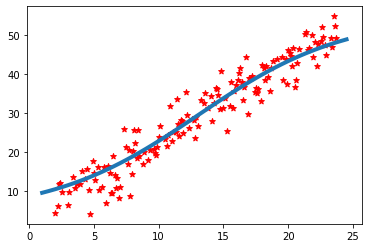

In [617]:
plot_h(w_optim,training_dataset)

In [620]:
EmpiricalError= MSE(w_optim, norm_test_dset)
print("MSE = {0:.4f}".format(EmpiricalError))

MSE = 0.0044


In [628]:
EpiricalError = float(0)
for i in range(len(testing_dataset)):
    EpiricalError = EpiricalError + pow((testing_dataset['y'][i] - h(segmoid(w_optim,[1,testing_dataset['x'][i]]))),2)
EpiricalError/len(testing_dataset)

10.88283213008454